In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

fruits = pd.read_table('../Mod_1/Dfs/fruit_data_with_colors.txt')

features_names = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[features_names]
y_fruits = fruits['fruit_label']
target_names = fruits['fruit_name'].unique()

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

In [2]:
# o MinMaxScaler é uma ferramenta de pré-processamento usada para redimensionar (escalonar) 
# as features (variáveis numéricas) de um conjunto de dados para que fiquem dentro de um 
# intervalo específico, geralmente entre 0 e 1.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)

print(f'Acurácia do classificador k-NN no conjunto de treino: {train_score:.2f}')
print(f'Acurácia do classificador k-NN no conjunto de test: {test_score:.2f}')

Acurácia do classificador k-NN no conjunto de treino: 0.95
Acurácia do classificador k-NN no conjunto de test: 0.80


In [4]:
example = [[5.5, 2.2, 10, 0.70]]
example_scaled = scaler.transform(example)
pred = knn.predict(example_scaled)
print(f'Acurácia do tipo de fruta {example} é {target_names[pred[0] - 1]}.')

Acurácia do tipo de fruta [[5.5, 2.2, 10, 0.7]] é mandarin.


c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [5]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset
from sklearn.datasets import make_regression
from sklearn.datasets import make_friedman1

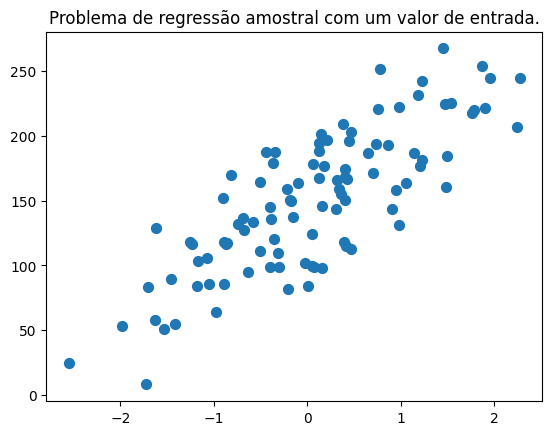

In [6]:
# Conjunto de dados sintéticos para regressão simples

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.figure()
plt.title('Problema de regressão amostral com um valor de entrada.')
X_R1, y_R1 = make_regression(n_samples=100, n_features=1,
                             n_informative=1, bias=150.0,
                             noise=30, random_state=0)
plt.scatter(X_R1, y_R1, marker='o', s=50)
plt.show()

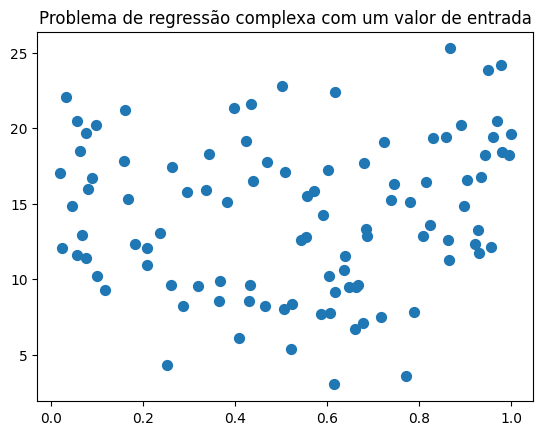

In [7]:
# Conjunto de dados sintéticos para regressão complexa

plt.figure()
plt.title('Problema de regressão complexa com um valor de entrada')
X_F1, y_F1 = make_friedman1(n_samples=100,
                            n_features=7, random_state=0)
plt.scatter(X_F1[:, 2], y_F1, marker='o', s=50)
plt.show()

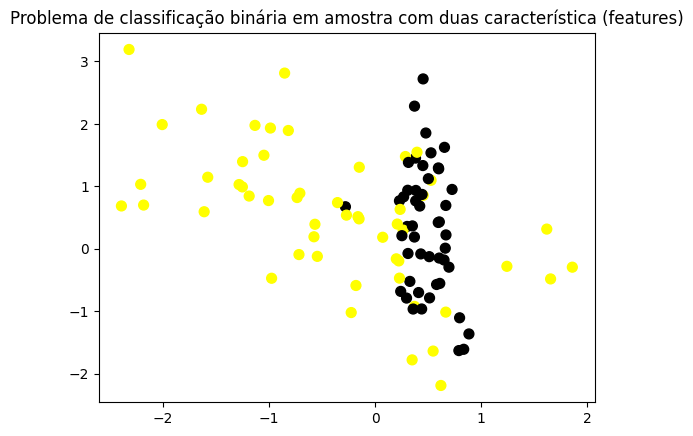

In [8]:
plt.figure()
plt.title('Problema de classificação binária em amostra com duas característica (features)')
X_C2, y_C2 = make_classification(n_samples=100, n_features=2,
                                 n_redundant=0, n_informative=2,
                                 n_clusters_per_class=1, flip_y=0.1,
                                 class_sep=0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2, marker='o', s=50, cmap=cmap_bold)
plt.show()

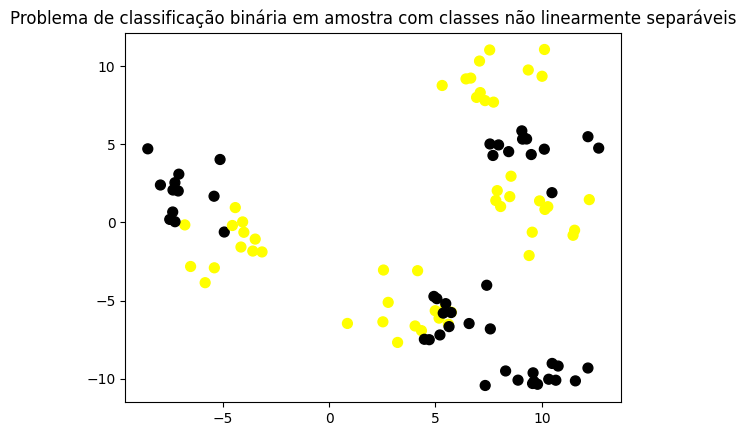

In [9]:
X_D2, y_D2 = make_blobs(n_samples=100, n_features=2, centers=8,
                        cluster_std=1.3, random_state=4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Problema de classificação binária em amostra com classes não linearmente separáveis')
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, marker='o', s=50, cmap=cmap_bold)
plt.show()

In [10]:
# Conjunto de dados de câncer de mama para o problema de classificação.
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Conjunto de dados sobre comunidades e crimes
(X_crime, y_crime) = load_crime_dataset()

# K-Vizinhos Próximos

## Classificação

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


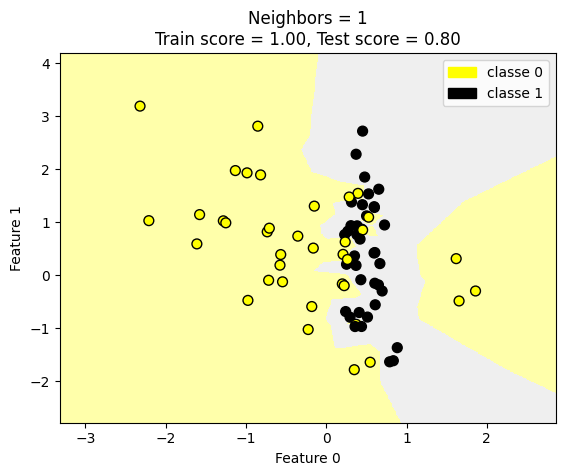

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


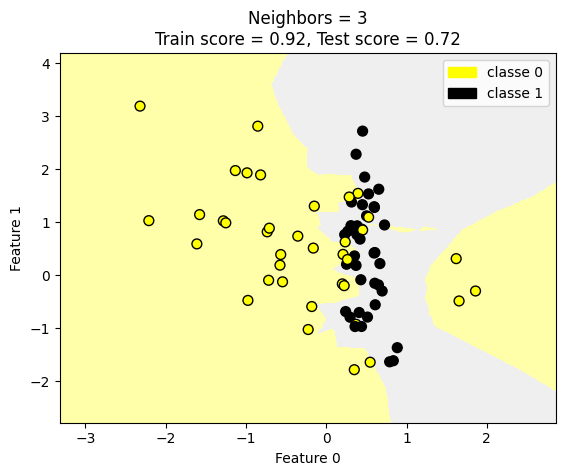

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


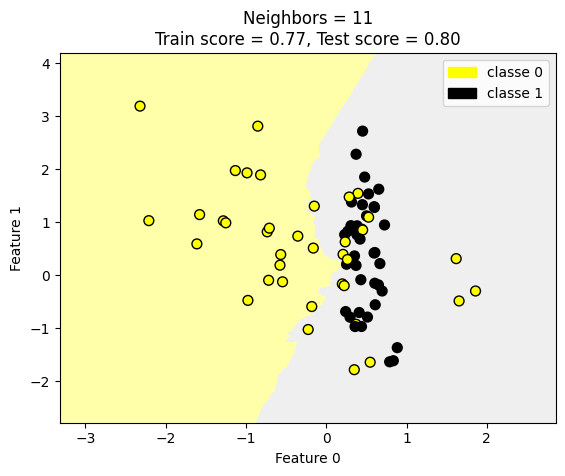

In [11]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)
plt.show()

## Regressão

In [12]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
score = knn_reg.score(X_test, y_test)
print(f'Pontuação do R^2: {score:.3f}')

Pontuação do R^2: 0.425


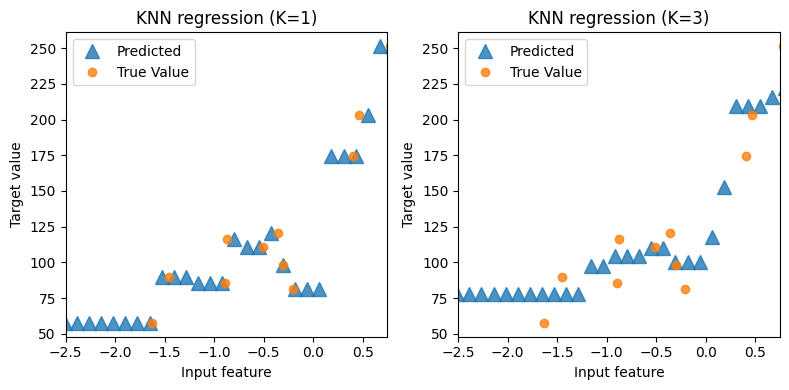

In [16]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

## Modelo de regressão com complexidade como função de K

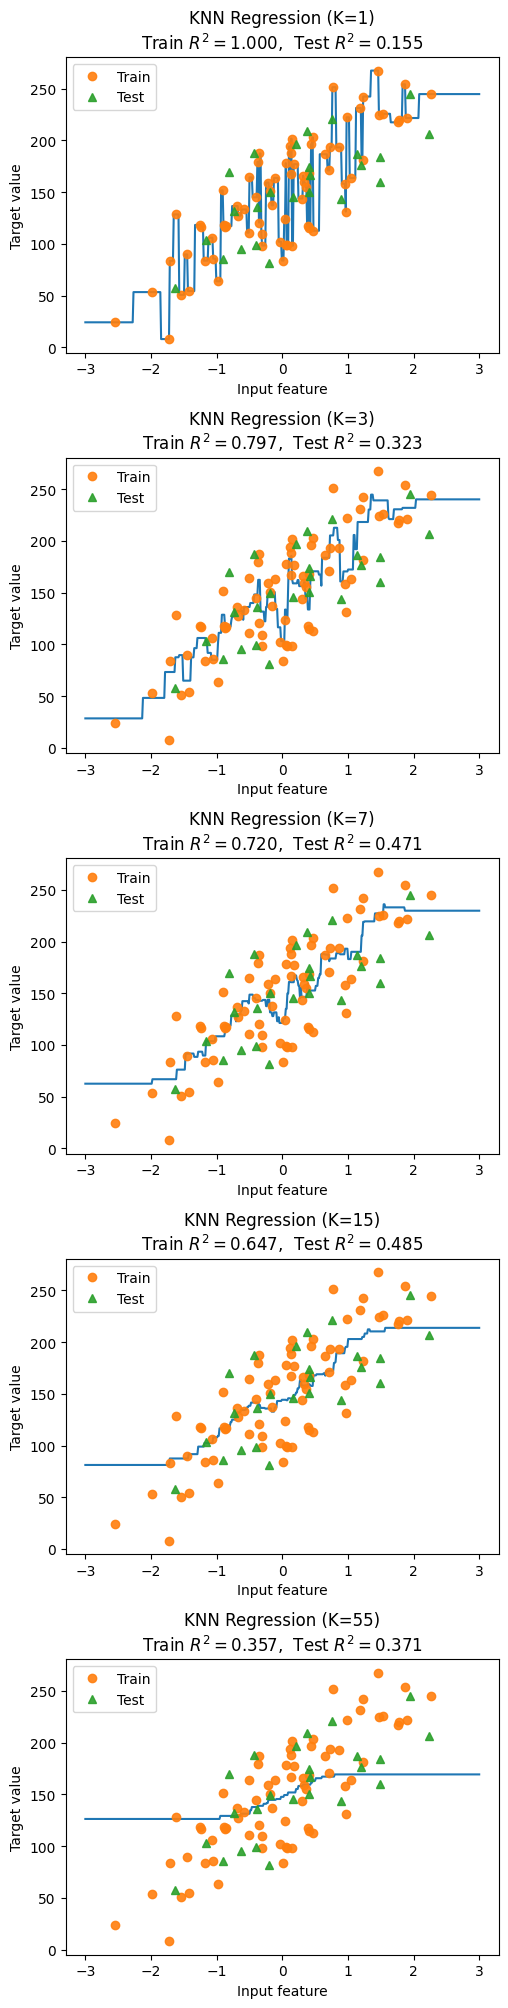

In [24]:
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
